In [1]:
'Notebooks da série de vídeos Deep Learning for Audio Classification'
'https://www.youtube.com/watch?v=Z7YM-HAz-IY&list=PLhA3b2k8R3t2Ng1WW_7MiXeh1pfQJQi_P'

'https://www.youtube.com/watch?v=Z7YM-HAz-IY&list=PLhA3b2k8R3t2Ng1WW_7MiXeh1pfQJQi_P'

In [11]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank

def plot_signals(signals):
    fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False,
                             sharey=False, figsize=(30,15))
    plt.subplots_adjust(wspace=0.01, hspace=0.3)
    fig.suptitle('Time Series', size=30, y=0.94)
    i = 0
    for x in range(5):
        for y in range(2):
            axes[x,y].set_title(list(signals.keys())[i], size=25)
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_fft(fft):
    fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False,
                             sharey=False, figsize=(30,15))
    plt.subplots_adjust(wspace=0.01, hspace=0.3)
    fig.suptitle('Fourier Transforms', size=30, y=0.94)
    i = 0
    for x in range(5):
        for y in range(2):
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x,y].set_title(list(fft.keys())[i], size=25)
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1          
            
def plot_spec(specs):
    fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False,
                             sharey=False, figsize=(30,15))
    plt.subplots_adjust(wspace=0.01, hspace=0.3)
    fig.suptitle('Spectrograms', size=30, y=0.94)
    i = 0
    for x in range(5):
        for y in range(2):
            data = list(specs.values())[i]
            Y, freq = data[0], data[1]
            axes[x,y].set_title(list(specs.keys())[i], size=25)
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1           
            
def plot_fbank(fbank):
    fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False,
                             sharey=True, figsize=(30,25))
    plt.subplots_adjust(left=None, wspace=0.01, hspace=None)
    fig.suptitle('Filter Bank Coefficients', size=30, y=0.91)
    i = 0
    for x in range(5):
        for y in range(2):
            axes[x,y].set_title(list(fbank.keys())[i], size=25)
            axes[x,y].imshow(list(fbank.values())[i],
                    cmap='inferno', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False,
                             sharey=True, figsize=(30,15))
    plt.subplots_adjust(wspace=0.01, hspace=0.3)
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=30, y=0.94)
    i = 0
    for x in range(5):
        for y in range(2):
            axes[x,y].set_title(list(mfccs.keys())[i], size=25)
            axes[x,y].imshow(list(mfccs.values())[i],
                    cmap='inferno', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

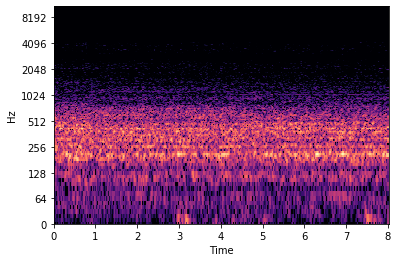

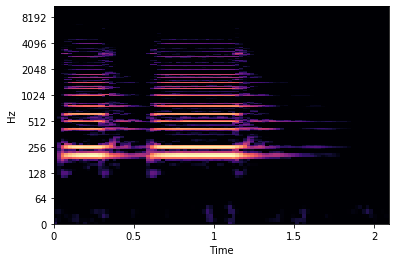

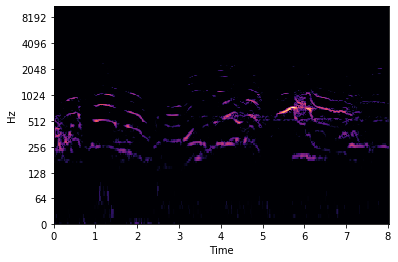

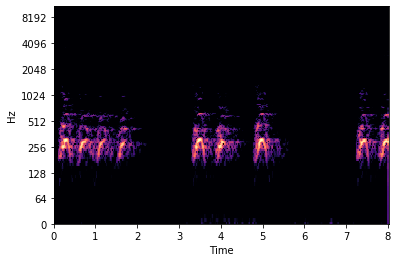

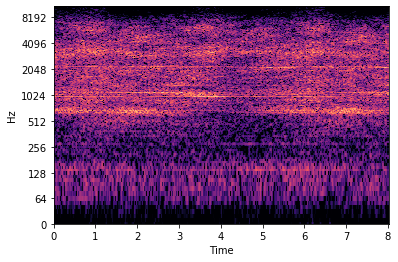

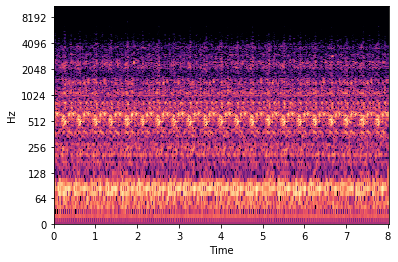

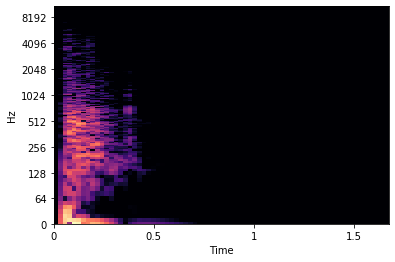

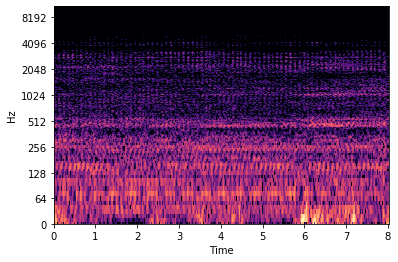

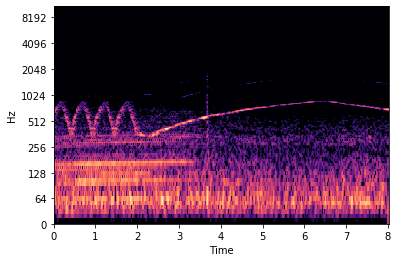

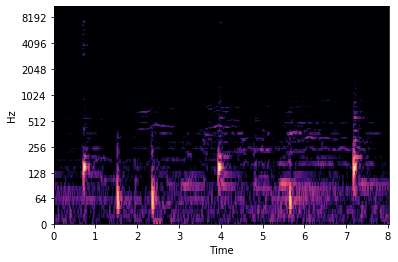

In [9]:
import librosa
import librosa.display
import glob

signals = {}
fft = {}
specs = {}
fbank = {}
mfccs = {}

def calc_fft(y, rate):
    n = len(y)
    freq = np.fft.rfftfreq(n, d=1/rate)
    Y = abs(np.fft.rfft(y)/n)
    return (Y, freq)

#D = librosa.stft(data)
#log_power = librosa.amplitude_to_db(D**2, ref=np.max)

#librosa.display.specshow(log_power, x_axis='time', y_axis='log')
#plt.colorbar();

files = glob.glob("US8KS/*.wav")
for f in files:
    filename = f.split("\\")[1].split(".")[0]
    signal, rate = librosa.load(f, sr=44100)
    signals[filename] = signal
    fft[filename] = calc_fft(signal, rate)
   
    D = librosa.stft(signal)
    log_power = librosa.amplitude_to_db(D**2, ref=np.max)
    fig = plt.figure()
    fig.axes.append(librosa.display.specshow(log_power, x_axis='time', y_axis='log'))
    specs[filename] = fig
    
    bank = logfbank(signal[:rate], rate, nfilt=26, nfft=1103).T
    fbank[filename] = bank
    mel = mfcc(signal[:rate], rate, numcep=13, nfilt=26, nfft=1103).T
    mfccs[filename] = mel

numcep max parece ser 26

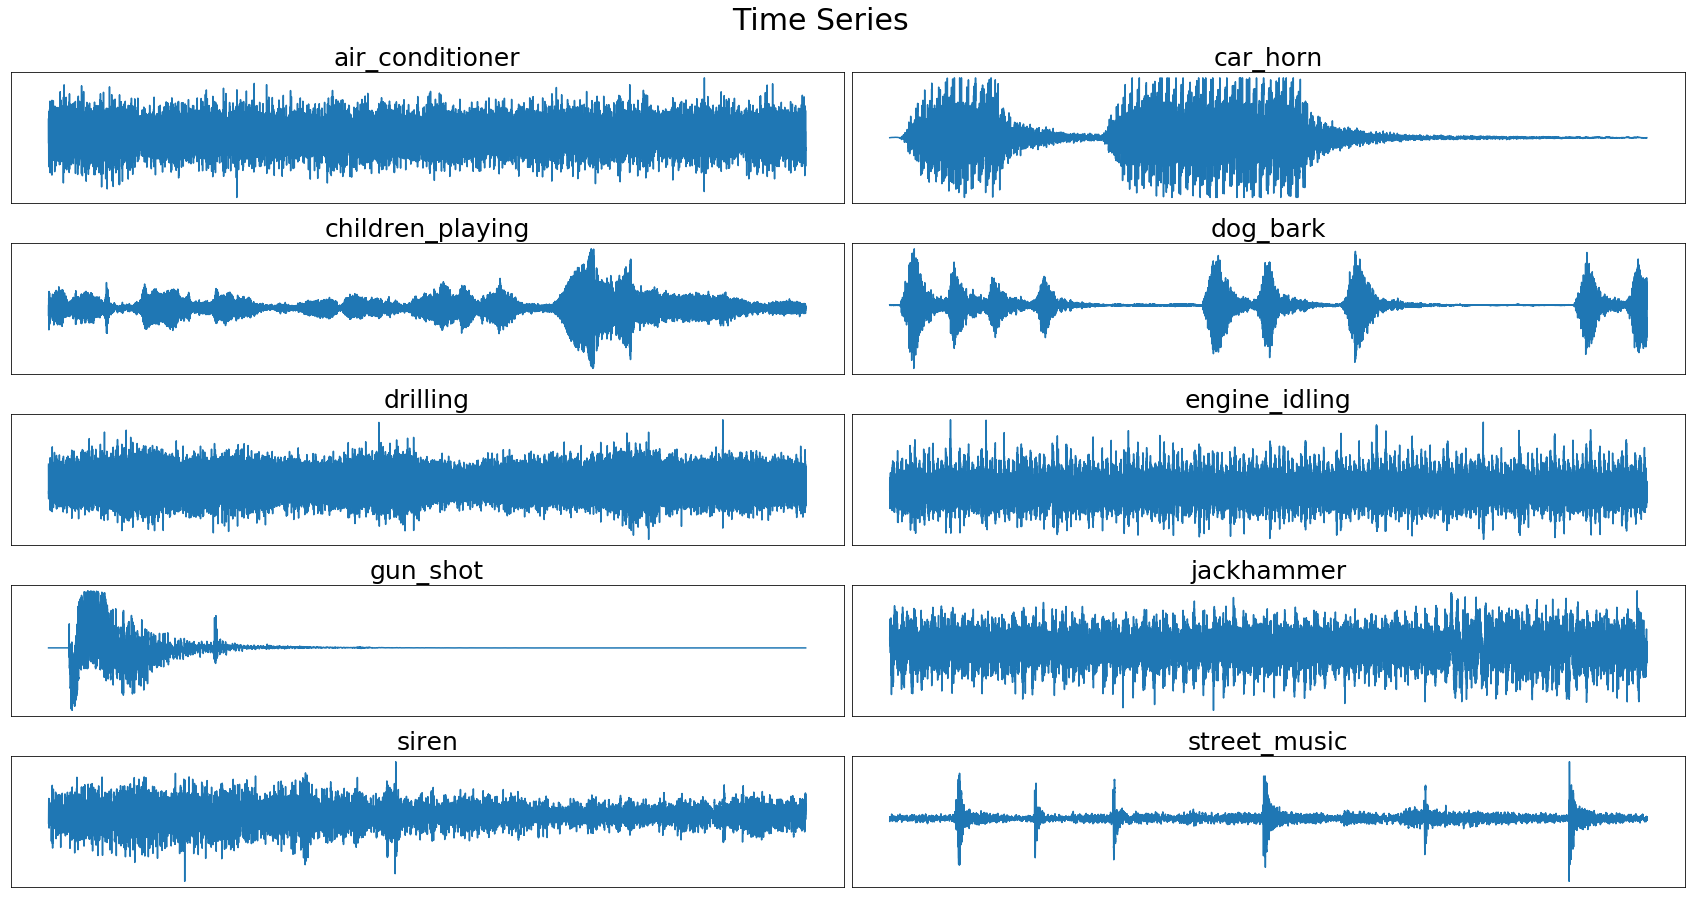

In [17]:
plot_signals(signals)
plt.show()

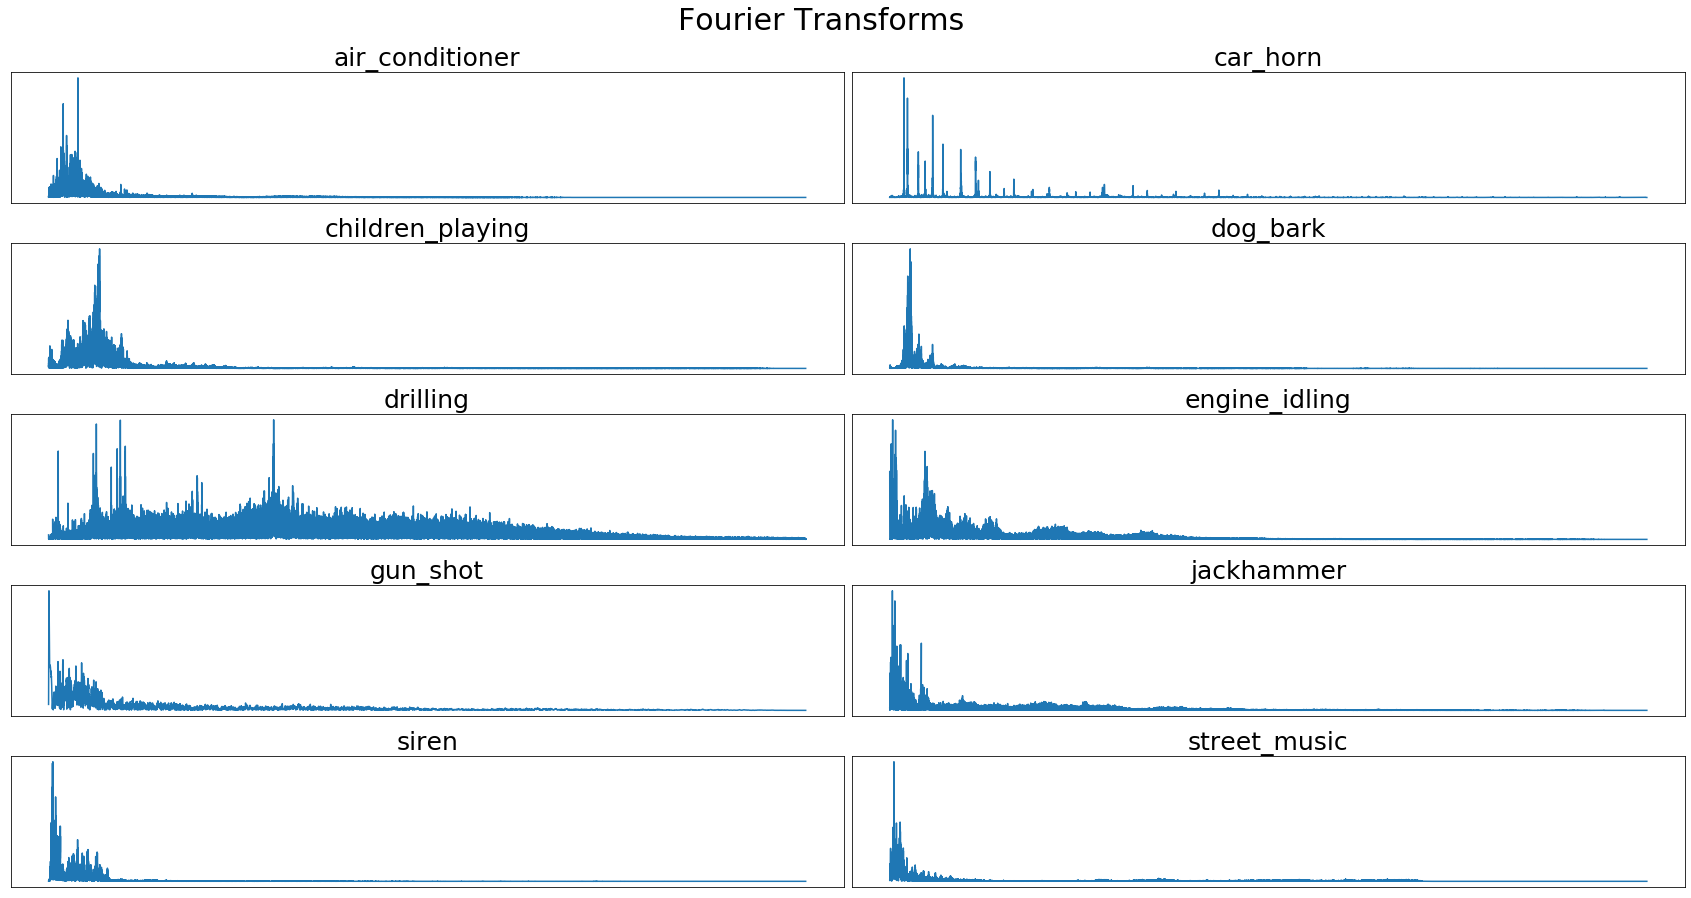

In [18]:
plot_fft(fft)
plt.show()

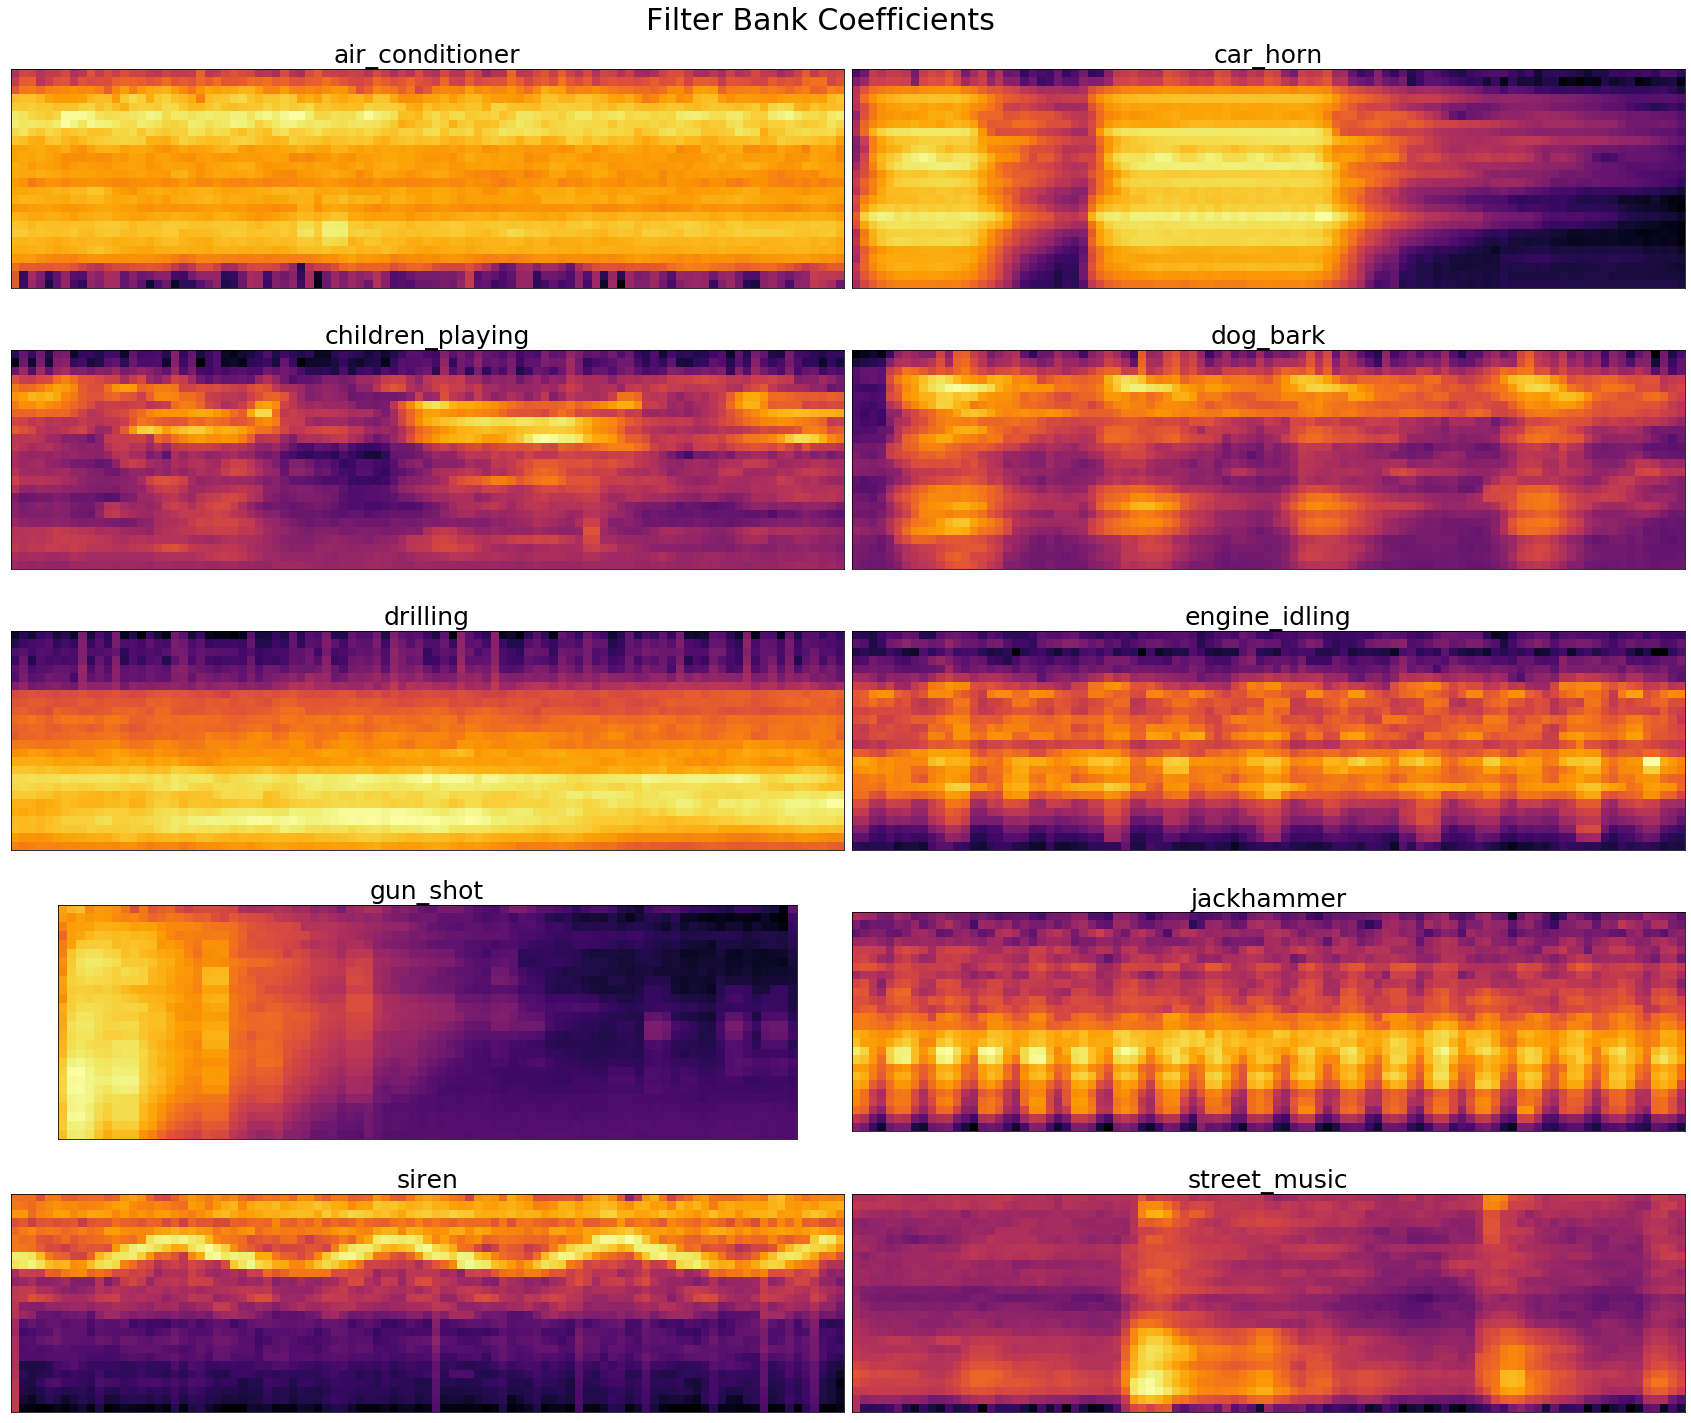

In [19]:
plot_fbank(fbank)
plt.show()

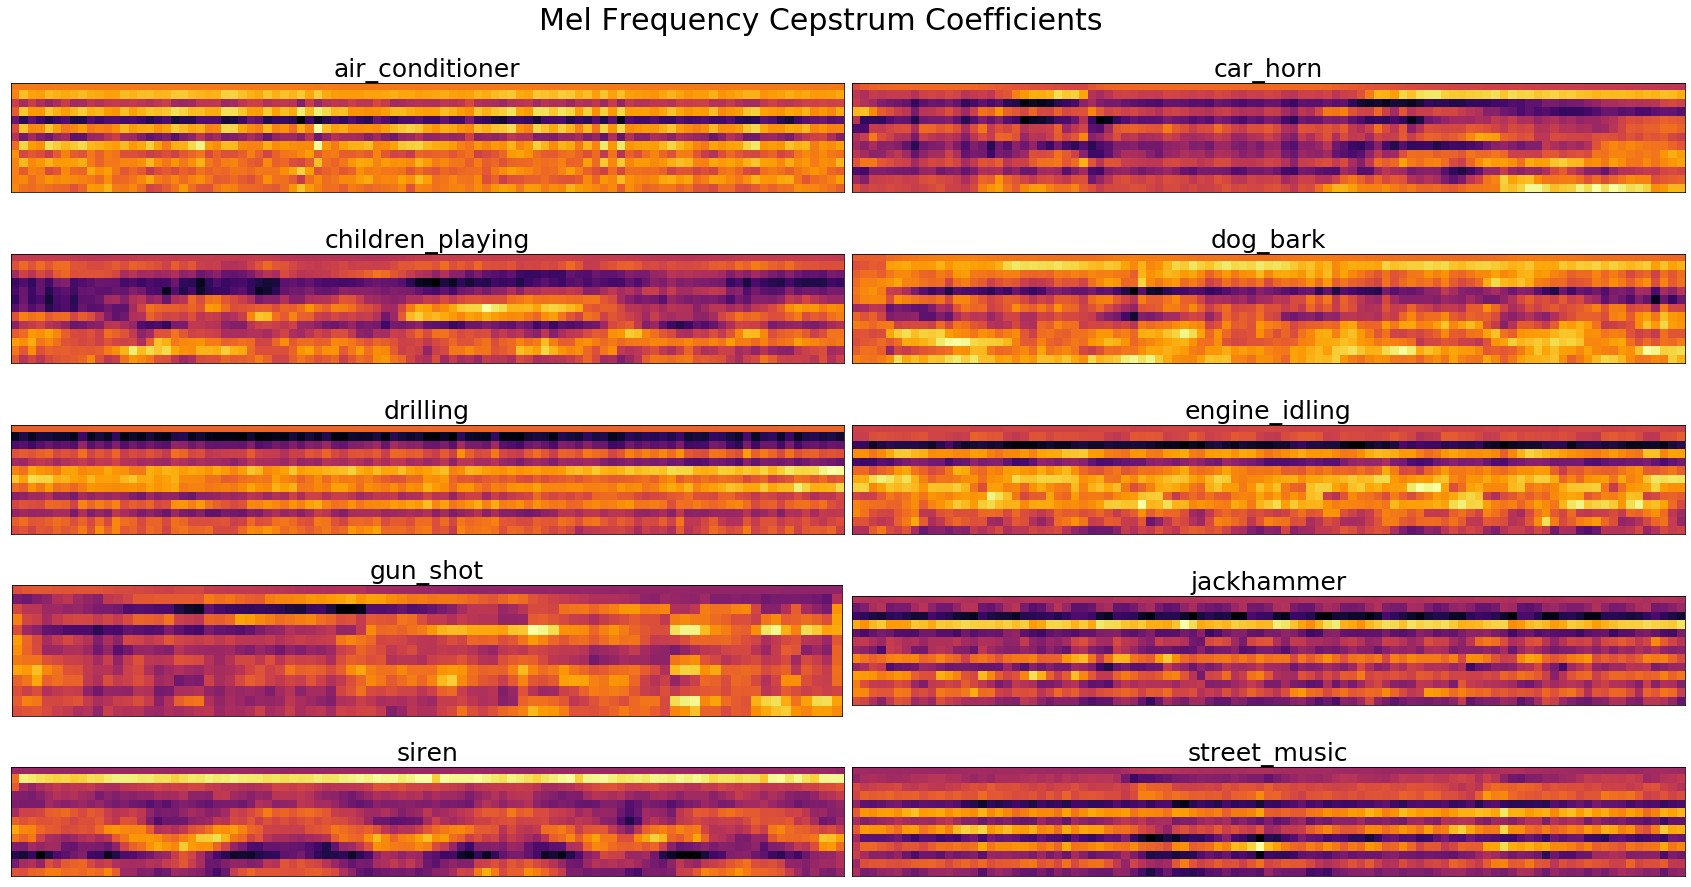

In [20]:
plot_mfccs(mfccs)
plt.show()

NameError: name 'freq' is not defined

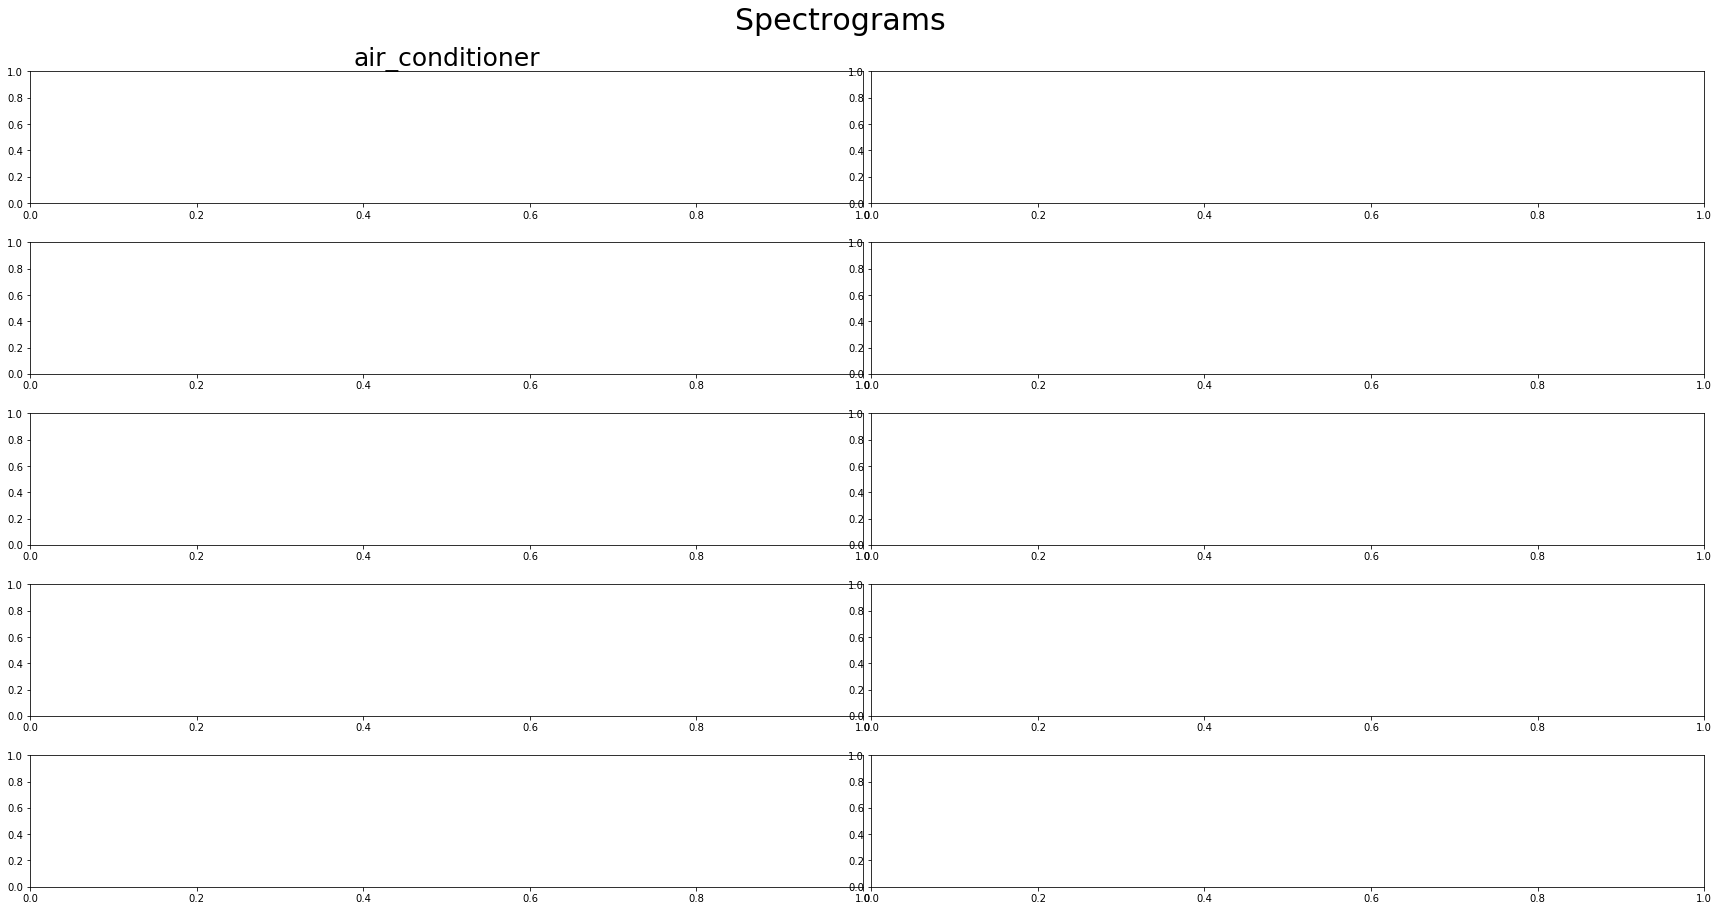

In [10]:
plot_spec(specs)
plt.show()

In [7]:
axes[4,0]

In [8]:
def plot_spectrograms(specs):
    fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False,
                             sharey=False, figsize=(30,15))
    plt.subplots_adjust(wspace=0.01, hspace=0.3)
    fig.suptitle('Spectrograms', size=30, y=0.94)
    i = 0
    for x in range(5):
        for y in range(2):
            axes[x,y].add_image((list(specs.values())[i]))

In [9]:
sp1, sp2 = specs["air_conditioner"].add_subplot(211), specs["dog_bark"].add_subplot(211)
sp1.plot([1, 2, 3])
sp2.plot([0, 1, 3])

specs["air_conditioner"].text(.5, .3, 'whole figure')
sp2.text(.5, .5, 'subplot')
plt.show(sp1)

TypeError: Image data of dtype object cannot be converted to float

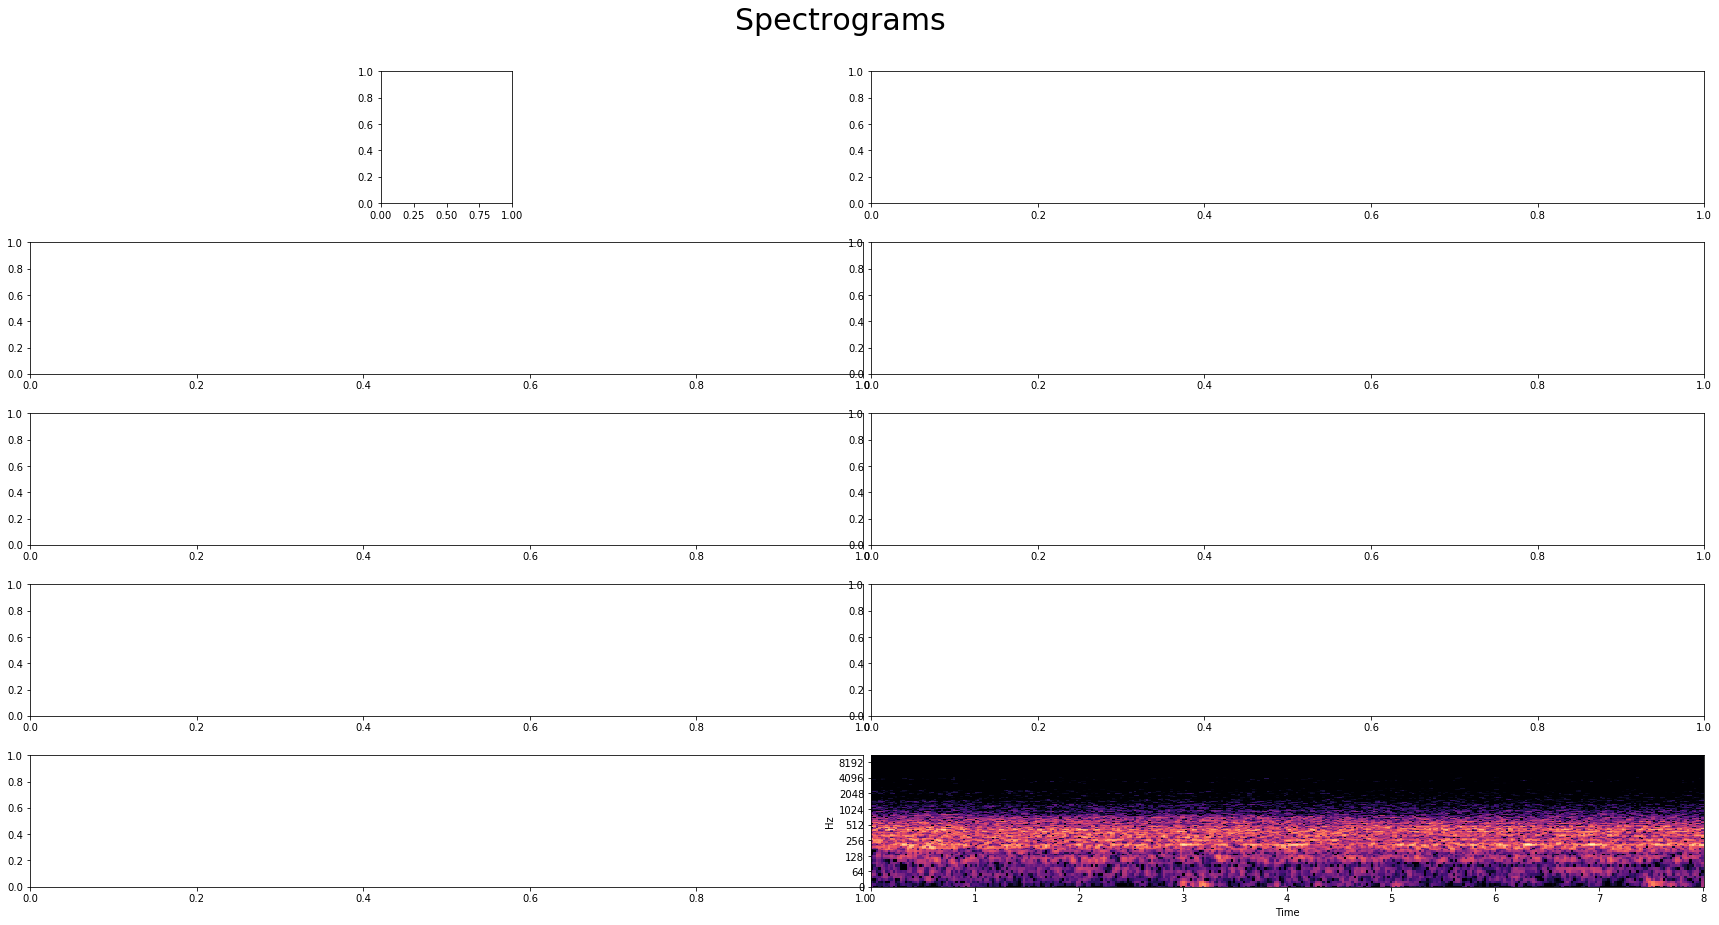

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False,
                         sharey=False, figsize=(30,15))
plt.subplots_adjust(wspace=0.01, hspace=0.3)
fig.suptitle('Spectrograms', size=30, y=0.94)
i = 0
for x in range(5):
    for y in range(2):
        file = files[i]
        filename = file.split("\\")[1].split(".")[0]
        signal, rate = librosa.load(file, sr=44100)
        D = librosa.stft(signal)
        log_power = librosa.amplitude_to_db(D**2, ref=np.max)
        
        axes[x,y].imshow(librosa.display.specshow(log_power, x_axis='time', y_axis='log'))
        i += 1
        
fig.show()

In [10]:
banana

NameError: name 'banana' is not defined

In [11]:
x.plot()
plt.show()

AttributeError: 'int' object has no attribute 'plot'

In [12]:
def plot_axes(ax, fig=None, geometry=(1,1,1)):
    if fig is None:
        fig = plt.figure()
    if ax.get_geometry() != geometry :
        ax.change_geometry(*geometry)
    ax = fig.axes.append(ax)
    return fig

In [13]:
fig = plt.figure(figsize=((10,8)))
plot_axes(specs["air_conditioner"], fig)
plt.show()

AttributeError: 'Figure' object has no attribute 'get_geometry'

<Figure size 720x576 with 0 Axes>

In [14]:
fig = plt.figure(figsize=((10,8)))
specs["air_conditioner"]
plt.show()

<Figure size 720x576 with 0 Axes>

In [15]:
specs["car_horn"].figure

In [16]:
specs

{'air_conditioner': <Figure size 432x288 with 2 Axes>,
 'car_horn': <Figure size 432x288 with 1 Axes>,
 'children_playing': <Figure size 432x288 with 1 Axes>,
 'dog_bark': <Figure size 432x288 with 2 Axes>,
 'drilling': <Figure size 432x288 with 1 Axes>,
 'engine_idling': <Figure size 432x288 with 1 Axes>,
 'gun_shot': <Figure size 432x288 with 1 Axes>,
 'jackhammer': <Figure size 432x288 with 1 Axes>,
 'siren': <Figure size 432x288 with 1 Axes>,
 'street_music': <Figure size 432x288 with 1 Axes>}

In [21]:
mfccs['air_conditioner']

array([[ -1.94750012,  -2.01392819,  -2.14217199, ...,  -2.29801195,
         -2.0830183 ,  -2.25726423],
       [ -0.07328676,  11.87328044,   6.88790817, ...,   4.9861725 ,
          5.54814241,   7.69700031],
       [-18.6103041 , -28.19698253, -19.09200258, ..., -17.18170674,
        -17.95402219, -17.37384313],
       ...,
       [ -0.63011307,  -9.97052495,  -0.37541605, ...,   1.26391686,
         -6.53330228,  -8.83137918],
       [ -0.6012431 ,   1.03615626,  -4.92305441, ...,  -4.11185351,
         -0.39837294,   6.17064994],
       [  1.03554301,  -4.50033271,  -5.80627749, ...,  -1.86002641,
         -4.30995131,  -8.4963656 ]])